# Analysis of the COVID-19 Data Set published by John Hopkins University Center for Systems Science and Engineering (JHU CSSE)
### The data is collected and distribued daily.
### Anyone can retrieve the full data set from this [GitHub](https://github.com/CSSEGISandData/COVID-19) site.
### The primary data files types are:
* Summary Files (Province/State, Country/Region, Last Update, Confirmed, Deaths, Recovered, Latitude, Longitude)
* Time Series Files (Province/State, Country/Region, Lat, Long, <dates>) for Confirmed, Deaths, and Recovered counts

In [49]:
# Initialization
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pathlib as p
import time as t

# Set this path to the directory where you have cloned the JHU CSSE Data Set
dir_covid_19 = p.PureWindowsPath(r"C:\Users\JeabD\OneDrive\Rice University\Project1_Resouces\COVID-19")
world_path = p.PureWindowsPath(r"Resources\world_pop_csv.csv")
# Set this date to the desired Summary Date
study_date = dt.date(2020, 3, 13)

## Summary Data
### Load the Summary File for the Study Date

In [50]:
# Daily Summary Statistics
mmddyyyy_study_date = study_date.strftime("%m-%d-%Y")
daily_report_filename = p.Path(dir_covid_19) / f"csse_covid_19_data/csse_covid_19_daily_reports/{mmddyyyy_study_date}.csv"
type(daily_report_filename)
ss = pd.read_csv(daily_report_filename)

In [51]:
ss[ss['Country/Region'] == 'Italy']

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
62,NaN,Italy,2020-03-11T20:00:00,17660,1266,1439,41.8719,12.5674


### Aggregate the Counts by Country

In [52]:
# Aggregate the summary data by country
ss_country = pd.pivot_table(ss, values=["Confirmed","Deaths","Recovered"], index="Country/Region", columns=None, aggfunc="sum")
ss_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,7,0,0
Albania,33,1,0
Algeria,26,2,8
Andorra,1,0,0
Antigua and Barbuda,1,0,0
...,...,...,...
US,2179,47,12
Ukraine,3,1,0
United Arab Emirates,85,0,17


## Time Series Data
### Load a time series of Confirmed case counts
###### (The same logic could be used for Death or Recovered counts.)

In [53]:
# Time Series -- Confirmed
time_series_confirmed_filename = p.Path(dir_covid_19) / "csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
#"C:\Users\norma\HDD_Documents\BootCamp\Projects\Project1\CoronaVirus\COVID-19\csse_covid_19_data\csse_covid_19_time_series\time_series_19-covid-Confirmed.csv"
tsc = pd.read_csv(time_series_confirmed_filename)
tsc_country = pd.pivot_table(tsc, index="Country/Region", aggfunc="sum").drop(columns=["Lat","Long"])
# Transpose the DataFrame, because Pandas likes the dates in the index
tsc_country = tsc_country.T

In [54]:
# Pandas is loading the column headings (now index values), which look like "mm/dd/yy" dates, as strings.
# The string representation of these dates don't sort chronologically.
# Change the string index to Timestamp index, which Pandas will treat as a DateTimeIndex (an index with extra features).
tsc_country.index = [pd.Timestamp(d) for d in tsc_country.index]
# Now sort the DataFrame by the Timestamp index
tsc_country = tsc_country.loc[tsc_country.index.sort_values(),:]
tsc_country

Country/Region,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,occupied Palestinian territory
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,2,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,5,0,0,0,0,0,0,2,0
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,5,0,4,0,0,0,0,2,0
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,5,0,4,0,0,0,0,2,0
2020-01-31,0,0,0,0,0,0,0,0,9,0,...,0,7,0,4,2,0,0,0,2,0


### Align the trends
* Create a DataFrame with Relative Date Counts.
* Remove the leading zero counts, to align the trends to start with the first non-zero value.

In [55]:
# Create an DataFrame full of NaN, to hold relative-day trends of infection for each country
npNaN = np.empty(tsc_country.shape)
npNaN[:] = np.NaN
npNaN.shape
rel_country = pd.DataFrame(npNaN, columns=tsc_country.columns.values)

In [66]:
# Shift the trends up, to start on relative day zero
for (the_column, the_data) in tsc_country.iteritems():
#     print(type(the_column), type(the_data),the_data)
    trend = np.trim_zeros(the_data.to_numpy(),'f')
    rel_country[the_column][0:len(trend)] = trend
#     break
    
rel_country.to_csv("output\diff_T_df.csv", index = False)

C:\Users\JeabD\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [121]:
diff_confirm_df = rel_country.diff(axis = 0)
# diff_confirm_df.to_csv("output\avg_diff.csv",index = True)
diff_confirm_df.head()

,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,...,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,occupied Palestinian territory
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,8.0,0.0,NaN
2,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,4.0,1.0,0.0,0.0,0.0,4.0,NaN,7.0,0.0,NaN
3,0.0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,NaN
4,0.0,10.0,0.0,0.0,NaN,6.0,0.0,NaN,3.0,6.0,...,1.0,3.0,0.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN


In [72]:
avg_change_df = pd.DataFrame(diff_confirm_df.mean(axis = 0)).reset_index()
avg_change_df.columns = ["country","average"]
avg_change_df.to_csv("output/avg_change.csv", index = True)
avg_change_df

,country,average
0,Afghanistan,0.952381
1,Albania,7.000000
2,Algeria,2.650000
3,Andorra,0.071429
4,Antigua and Barbuda,0.000000
...,...,...
151,Uruguay,2.000000
152,Uzbekistan,5.000000
153,Venezuela,7.500000
154,Vietnam,1.113208


In [59]:
world_pop_df = pd.read_csv(r"Resources\world_pop_utf.csv", encoding = 'UTF-8')

world_pop_df.to_csv("output/world_pop.csv", index = False)
world_pop_df.columns

Index(['Country ', 'world Population 2020'], dtype='object')

In [99]:
scatterPlt_df = pd.merge(avg_change_df,world_pop_df, left_on = 'country', right_on = 'Country ')
scatterPlt_df.drop(['Country '], axis = 1, inplace = True)
scatterPlt_df.head(5)

,country,average,world Population 2020
0,Afghanistan,0.952381,"38,928,346"
1,Algeria,2.650000,"43,851,044"
2,Argentina,4.230769,"45,195,774"
3,Armenia,3.400000,"2,963,243"
4,Australia,7.460000,"25,499,884"


In [100]:
# normalize the population

# scatterPlt_df['normalize'] = (scatterPlt_df["world Population 2020"]*100000)/100
scatterPlt_df.dtypes
# scatterPlt_df.head()

country                   object
average                  float64
world Population 2020     object
dtype: object

In [101]:
scatterPlt_df['world Population 2020'] = scatterPlt_df['world Population 2020'].str.replace(',','').astype(float)
scatterPlt_df

,country,average,world Population 2020
0,Afghanistan,0.952381,38928346.0
1,Algeria,2.650000,43851044.0
2,Argentina,4.230769,45195774.0
3,Armenia,3.400000,2963243.0
4,Australia,7.460000,25499884.0
...,...,...,...
98,United Kingdom,34.422222,67886011.0
99,Uruguay,2.000000,3473730.0
100,Uzbekistan,5.000000,33469203.0
101,Venezuela,7.500000,28435940.0


In [102]:
scatterPlt_df.dtypes

country                   object
average                  float64
world Population 2020    float64
dtype: object

In [107]:
scatterPlt_df['normalize'] = (scatterPlt_df["world Population 2020"]*100000)/100
scatterPlt_df

,country,average,world Population 2020,normalize
0,Afghanistan,0.952381,38928346.0,3.892835e+10
1,Algeria,2.650000,43851044.0,4.385104e+10
2,Argentina,4.230769,45195774.0,4.519577e+10
3,Armenia,3.400000,2963243.0,2.963243e+09
4,Australia,7.460000,25499884.0,2.549988e+10
...,...,...,...,...
98,United Kingdom,34.422222,67886011.0,6.788601e+10
99,Uruguay,2.000000,3473730.0,3.473730e+09
100,Uzbekistan,5.000000,33469203.0,3.346920e+10
101,Venezuela,7.500000,28435940.0,2.843594e+10


No handles with labels found to put in legend.


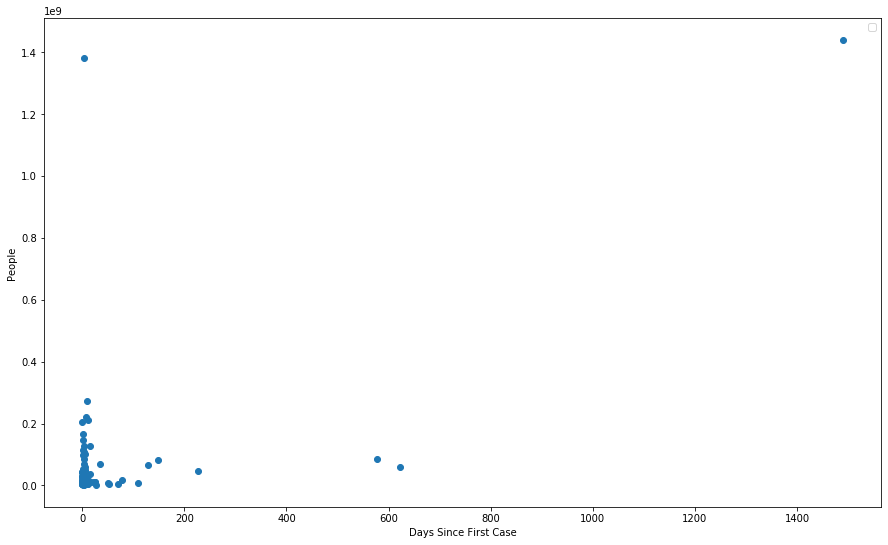

In [108]:
# Scatter Plot x = Average Confirmed cased per day, y = Population

fig1 = plt.figure(1, figsize=(15,9))

plt.scatter(scatterPlt_df['average'],scatterPlt_df['world Population 2020'])
plt.legend()
plt.title("")
plt.xlabel("Days Since First Case")
# plt.savefig("./ConfirmedCasesForSelectedCountries.png")
_ = plt.ylabel("People")
# The "_ = " catches the return value of the last command, so it doesn't distract from the figure

In [113]:
import seaborn as sns


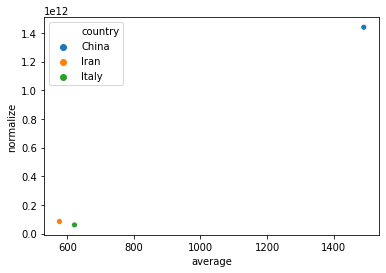

In [127]:
country_interest = ['China','Italy','Iran','South Korea']

country_interest_df = scatterPlt_df.loc[scatterPlt_df['country'].isin(country_interest)]
sns.scatterplot(country_interest_df['average'],country_interest_df['normalize'],hue = country_interest_df['country'])
plt.legend()

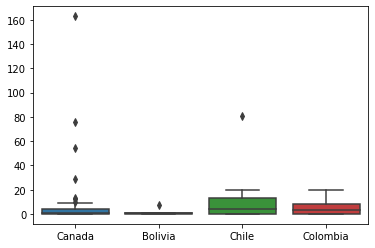

In [125]:


diff_confirm_df = diff_confirm_df.reindex(country_interest, axis =1)

sns.boxplot(data = diff_confirm_df)